# Pymaceuticals Inc.
                                             
                                            Analysis
•	The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
•	Another analysis I came up with is the heavier the mouse the more medicine it can intake, the lighter the mouse the less medicine it can intake. 
•	Another factor is the weight of the mouse the heavier the mouse the medicine it can intake. 




 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")



# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_data = total_data["Mouse ID"].unique()
number_of_mice= len(mice_data)
number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_ID= duplicate_mice["Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID= total_data.loc[total_data["Mouse ID"] == duplicate_mice_ID[0]]
duplicate_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_Data_Frame=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_Data_Frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = clean_Data_Frame["Mouse ID"].nunique()
print(number_of_clean_mice)

249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor = clean_Data_Frame['Tumor Volume (mm3)'].groupby(clean_Data_Frame['Drug Regimen']).mean()
median_tumor = clean_Data_Frame['Tumor Volume (mm3)'].groupby(clean_Data_Frame['Drug Regimen']).median()
tumor_variance= clean_Data_Frame['Tumor Volume (mm3)'].groupby(clean_Data_Frame['Drug Regimen']).var()
tumor_std_dev = clean_Data_Frame['Tumor Volume (mm3)'].groupby(clean_Data_Frame['Drug Regimen']).std()
tumor_std_err = clean_Data_Frame['Tumor Volume (mm3)'].groupby(clean_Data_Frame['Drug Regimen']).sem

summary_data= pd.DataFrame({"Mean Tumor Volume": mean_tumor,
                            "Median Tumor Volume": median_tumor,
                             "Tumor Volume Variance": tumor_variance,
                              "Tumor Volume Std. Dev.": tumor_std_dev,
                               "Tumor Volume Std. Err.": tumor_std_err})

summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,<bound method GroupBy.sem of <pandas.core.grou...
Ceftamin,52.591172,51.776157,39.290177,6.268188,<bound method GroupBy.sem of <pandas.core.grou...
Infubinol,52.884795,51.820584,43.128684,6.567243,<bound method GroupBy.sem of <pandas.core.grou...
Ketapril,55.235638,53.698743,68.553577,8.279709,<bound method GroupBy.sem of <pandas.core.grou...
Naftisol,54.331565,52.509285,66.173479,8.134708,<bound method GroupBy.sem of <pandas.core.grou...
Placebo,54.033581,52.288934,61.168083,7.821003,<bound method GroupBy.sem of <pandas.core.grou...
Propriva,52.393463,50.909965,43.138803,6.568014,<bound method GroupBy.sem of <pandas.core.grou...
Ramicane,40.216745,40.673236,23.486704,4.846308,<bound method GroupBy.sem of <pandas.core.grou...
Stelasyn,54.233149,52.431737,59.450562,7.710419,<bound method GroupBy.sem of <pandas.core.grou...


In [9]:
 # A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics= clean_Data_Frame.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

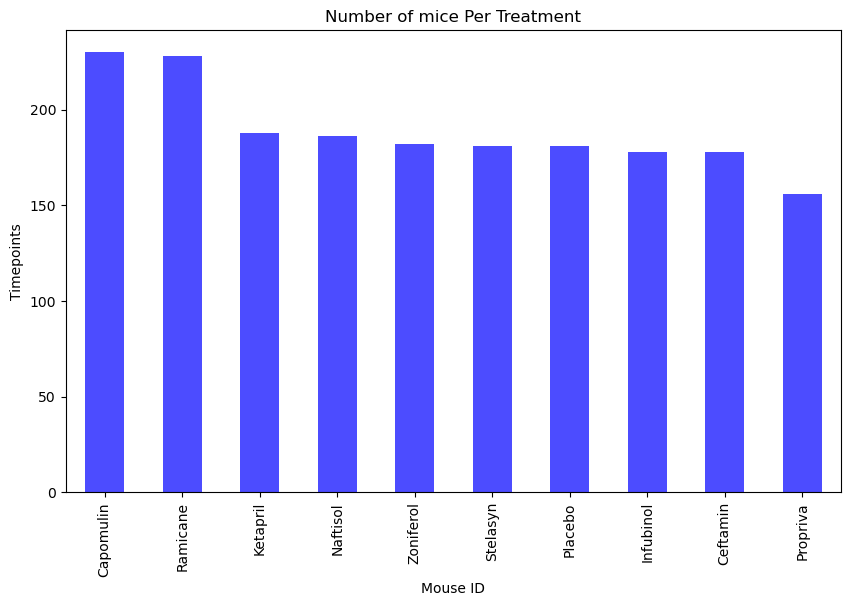

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_Data_Frame['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='b', alpha=0.7, figsize=(10, 6))
plt.xlabel("Mouse ID")
plt.ylabel("Timepoints")
plt.title("Number of mice Per Treatment")
plt.show()

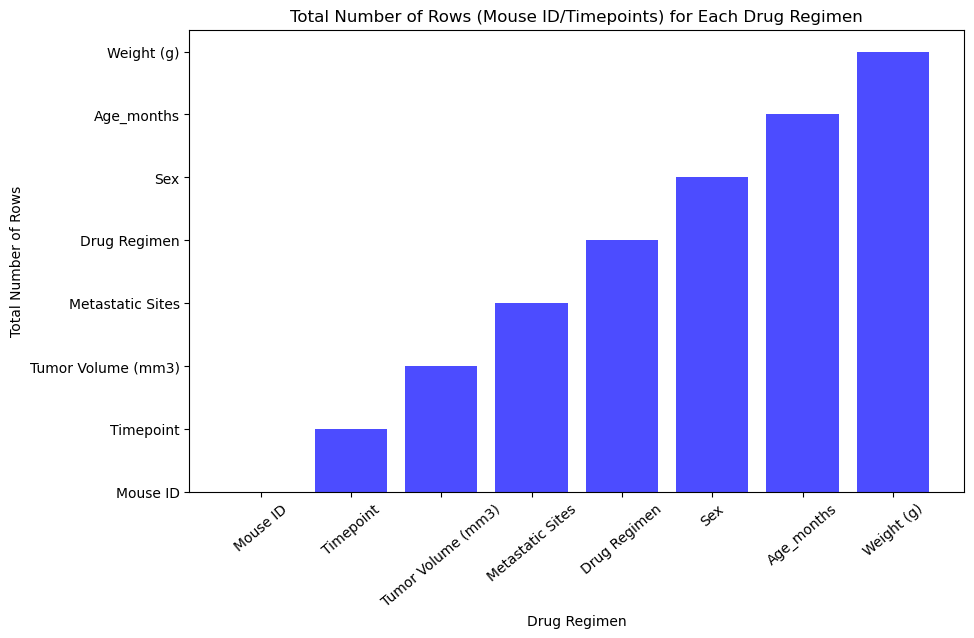

In [77]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_values= list(total_data)
y_values= list(total_data)
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='b', alpha=0.7)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=40) 
plt.show()

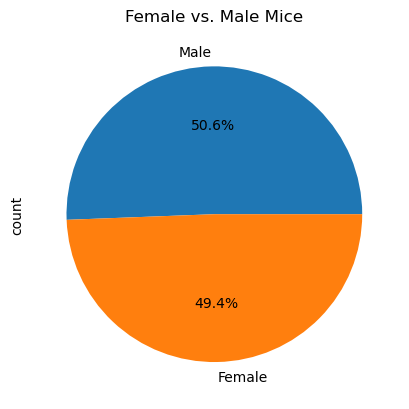

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = total_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

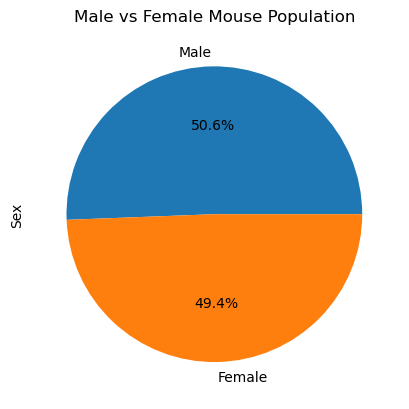

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.4, 50.6]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomilin_vol= total_data.loc[total_data['Drug Regimen'] == "Capomulin",:]
Ramicane_vol= total_data.loc[total_data['Drug Regimen'] == "Ramicane",:]
Infubinol_vol = total_data.loc[total_data['Drug Regimen']=="Infubinol",:]
Ceftamin_vol = total_data.loc[total_data['Drug Regimen'] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = total_data.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, total_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(Capomulin_vol, total_data , on=['Mouse ID', 'Timepoint'], how='inner')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_data = ["Capmulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capmulin= []
tumor_ramicane= []
tumor_infubinol= []
tumor_ceftamin= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capmulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == Treatments_data[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == Treatments_data[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == Treatments_data[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_capmulin,
                       Treatments_data[1]: tumor_ramicane,
                       Treatments_data[2]: tumor_infubinol,
                       Treatments_data[3]: tumor_ceftamin
                       })                
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


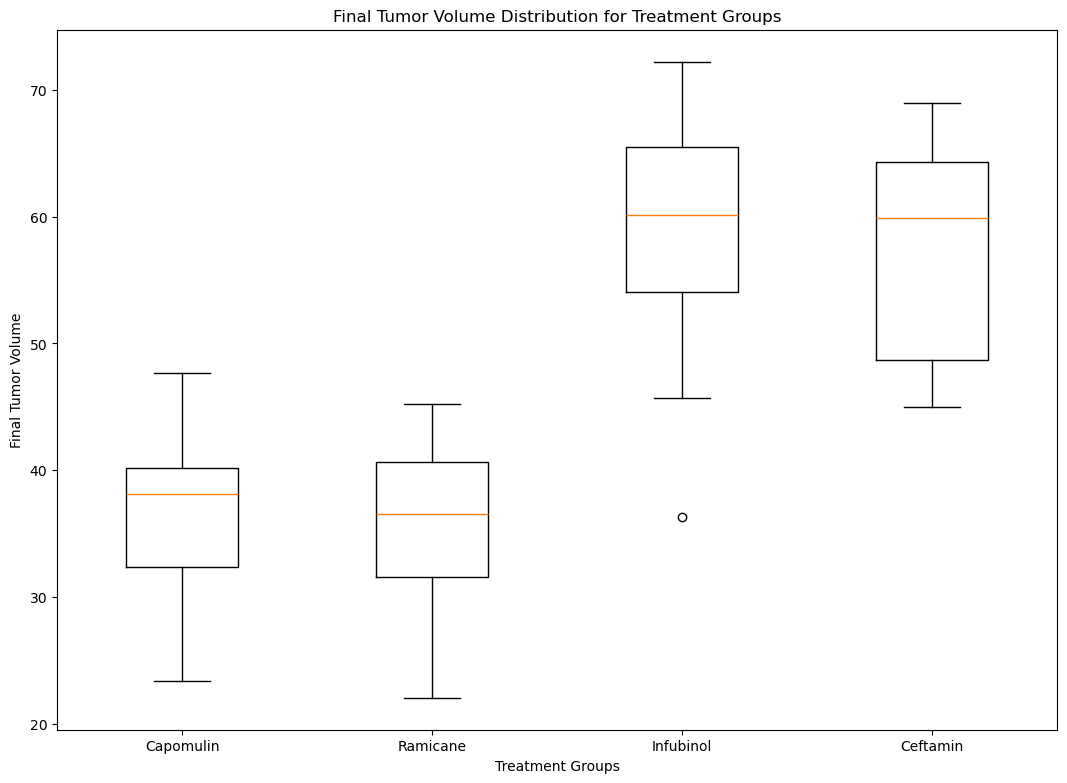

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dis_data = [tumor_capmulin, tumor_ramicane, tumor_infubinol, tumor_ceftamin]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating boxplot
bp = ax.boxplot(dis_data)

# Adding labels to x-axis
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Adding title and labels
plt.title('Final Tumor Volume Distribution for Treatment Groups')
plt.xlabel('Treatment Groups')
plt.ylabel('Final Tumor Volume')

# Highlighting potential outliers
for i in range(len(dis_data)):
    for j in bp['fliers'][i].get_xdata():
        ax.annotate(f'{j:.2f}', (j, i), color='red')

# Showing the plot
plt.show()
 

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

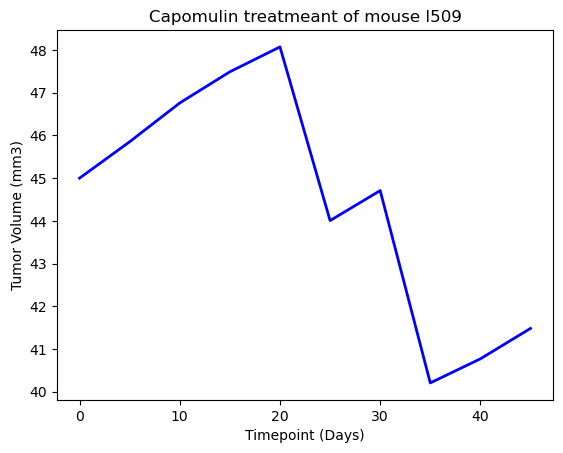

In [78]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = total_data.loc[total_data["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

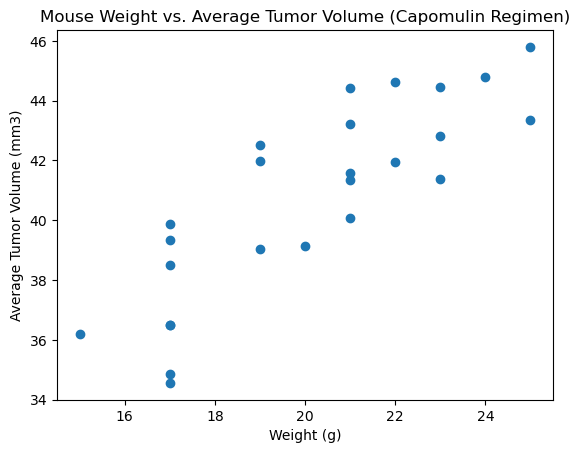

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_Data_Frame[clean_Data_Frame['Drug Regimen'] == 'Capomulin']


avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


capomulin_data_with_weight = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')


plt.scatter(capomulin_data_with_weight['Weight (g)'], capomulin_data_with_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


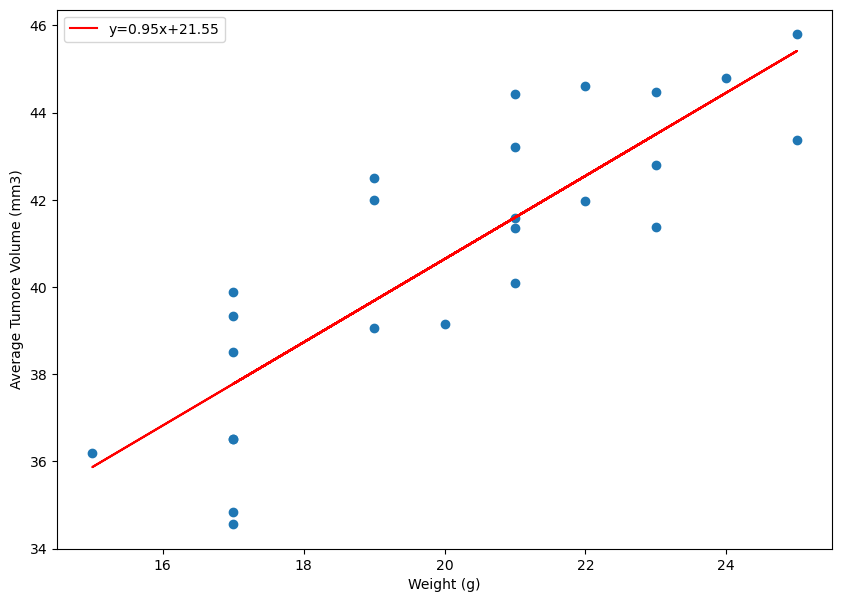

In [64]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation=round(st.pearsonr(capomulin_data_with_weight['Weight (g)'],capomulin_data_with_weight['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

lin_reg=st.linregress(capomulin_data_with_weight['Weight (g)'],capomulin_data_with_weight['Tumor Volume (mm3)'])
lin_reg

slope=0.9544396890241045
intercept=21.552160532685015 
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07 
stderr=0.1275435903320134

line = slope*(capomulin_data_with_weight['Weight (g)'])+intercept

plt.figure(figsize=(10,7))
plt.scatter(capomulin_data_with_weight['Weight (g)'],capomulin_data_with_weight['Tumor Volume (mm3)'])
plt.plot(capomulin_data_with_weight['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend(loc="best")  
plt.show()                 



